<a href="https://colab.research.google.com/github/harimshin/data-science-portfolio/blob/main/Metrics_Development_for_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metrics Development for Pokémon

In this project, I develop and suggest new metrics by overcoming limits of `total`, the evaluation metric included in the dataset.

**Variables**

● `Number` Pokémon ID in the Pokédex. <br>
● `Name` Name of the Pokémon. <br>
● `Type_1` Primary type. <br>
● `Type_2` Second type, in case the Pokémon has it. <br>
● `Total` Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special
Defense, and Speed). <br>
● `HP` Base Health Points. <br>
● `Attack` Base Attack. <br>
● `Defense` Base Defense. <br>
● `Sp_Atk` Base Special Attack. <br>
● `Sp_Def` Base Special Defense. <br>
● `Speed` Base Speed. <br>

**1. Data Preparation**

In [ ]:
# import necessary libraries

import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# import the csv file
column_names = [
    "Number", "Name", "Type_1", "Type_2", "Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed",
    "Generation", "isLegendary", "Color", "hasGender", "Pr_male", "Egg_Group_1", "Egg_Group_2",
    "hasMegaEvolution", "Height_m", "Weight_kg", "Catch_Rate", "Body_Style"
]
url = 'https://raw.githubusercontent.com/harimshin/private_data/d65f7259cca26a00ad90775dcbac7faaa8f71f0c/PokemonStats.csv'
response = requests.get(url)
response.raise_for_status()

# read the csv file into a pandas dataframe
df = pd.read_csv(io.StringIO(response.text), names = column_names, skiprows=1)
print(df.head())

   Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  ...  Color  hasGender  Pr_male Egg_Group_1  Egg_Group_2  \
0      65  ...  Green       True    0.875     Monster        Grass   
1      80  ...  Green       True    0.875     Monster        Grass   
2     100  ...  Green       True    0.875     Monster        Grass   
3      50  ...    Red       True    0.875     Monster       Dragon   
4      65  ...    Red       True    0.875     Monster       Dragon   

   hasMegaEvolution Height_m Weight_kg  Catch_Rate      Body_Style  
0             False     0.71       6.9          45   

**2. Data Exploration**

Among all the stats provided, I will only consider the stats directly related to the battle and raids, `HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, and `Speed` to construct the final evaluation metric, because the effects of the other stats on the strength of the Pokémon are ambiguous. If they are somehow related to Pokémon strength, we can presume that they are already reflected on `HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, and `Speed`.

`Total` is the precalculated metric, which is the sum of these stats. The equation is as follows:

$$Total = HP + Attack + Defense + Sp\_Atk + Sp\_Def + Speed$$

The histograms of the stats are as below:


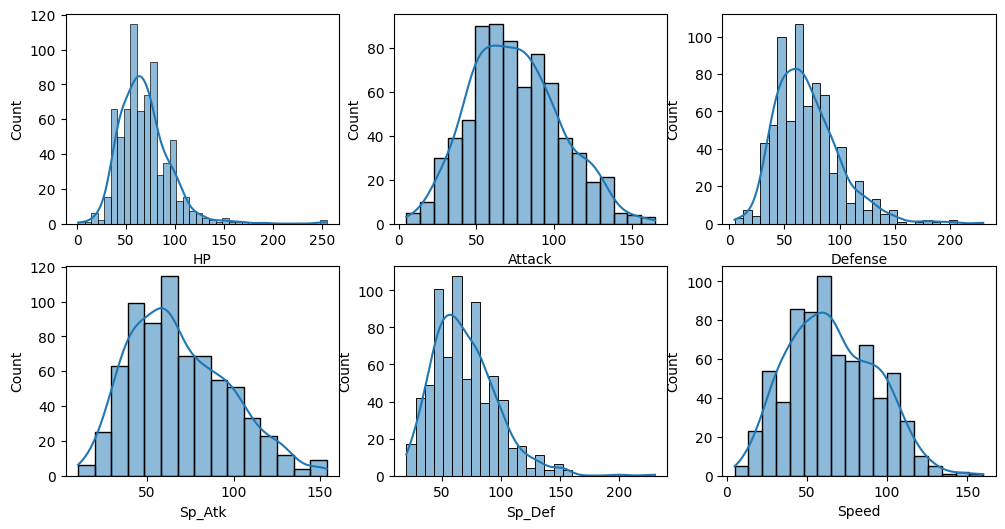

In [ ]:
# histograms of stats

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
sns.histplot(df['HP'], kde=True, ax = axes[0, 0])
sns.histplot(df['Attack'], kde=True, ax = axes[0, 1])
sns.histplot(df['Defense'], kde=True, ax = axes[0, 2])
sns.histplot(df['Sp_Atk'], kde=True, ax = axes[1, 0])
sns.histplot(df['Sp_Def'], kde=True, ax = axes[1, 1])
sns.histplot(df['Speed'], kde=True, ax = axes[1, 2])
plt.show()

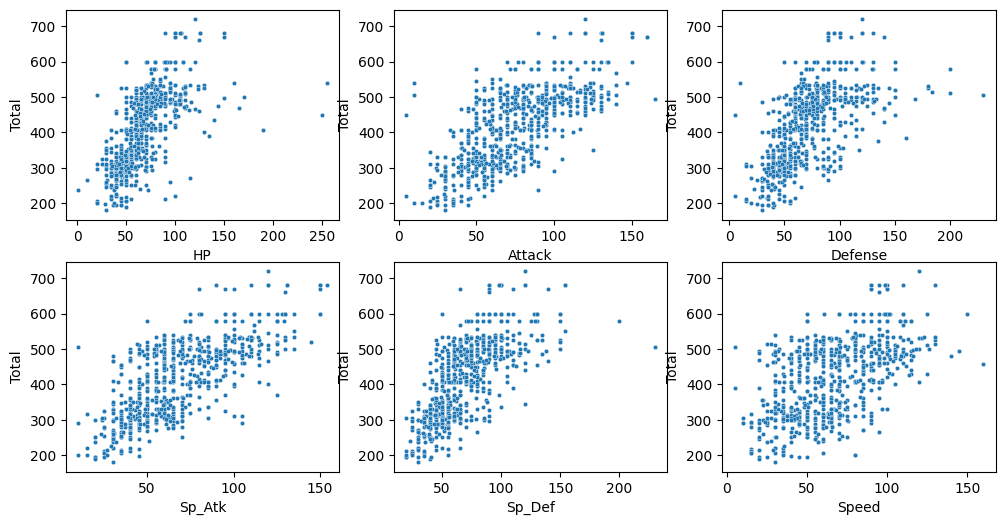

In [ ]:
# scatterplots between Total and stats

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
sns.scatterplot(data=df, x='HP', y='Total', ax = axes[0, 0], s = 10)
sns.scatterplot(data=df, x='Attack', y='Total', ax = axes[0, 1], s = 10)
sns.scatterplot(data=df, x='Defense', y='Total', ax = axes[0, 2], s = 10)
sns.scatterplot(data=df, x='Sp_Atk', y='Total', ax = axes[1, 0], s = 10)
sns.scatterplot(data=df, x='Sp_Def', y='Total', ax = axes[1, 1], s = 10)
sns.scatterplot(data=df, x='Speed', y='Total', ax = axes[1, 2], s = 10)
plt.show()

We can observe that the stats `HP`,`Defense`, and `Sp_Def` have right-skewed distribution from the histograms. As a result, `Total`, which is presumably used to determine how strong a Pokémon is in battles or raids, is so sensitive to these stats as we can verify from the scatterplots. Thus, if a user considers `Total` as the crucial metric in selecting a Pokémon, a Pokémon with higher `HP`/`Defense`/`Sp_Def` might be chosen over a Pokémon with higher `Attack`/`Sp_Atk`/`Speed`. This choice will let users neglect essential stats for strong Pokémon, which would make them choose less effective Pokemon for their win in battles or raids. Also, this will result in defensive gaming, reducing the tension and suspense of the game in general.


**3. Metrics Development: *ScaledSum* and *ScaledProduct***
<br>
*3-a. Normalization to normality*
<br>
To approximate the right-skewed stats to a normal distribution, I compared the results of logarithmic transformation and root square transformation.

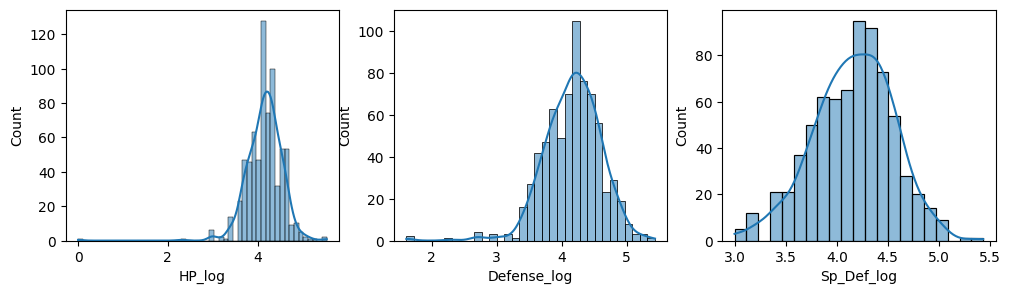

In [ ]:
# logarithmic transformation

df['HP_log'] = np.log(df['HP'])
df['Defense_log'] = np.log(df['Defense'])
df['Sp_Def_log'] = np.log(df['Sp_Def'])

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(df['HP_log'], kde=True, ax = axes[0])
sns.histplot(df['Defense_log'], kde=True, ax = axes[1])
sns.histplot(df['Sp_Def_log'], kde=True, ax = axes[2])
plt.show()

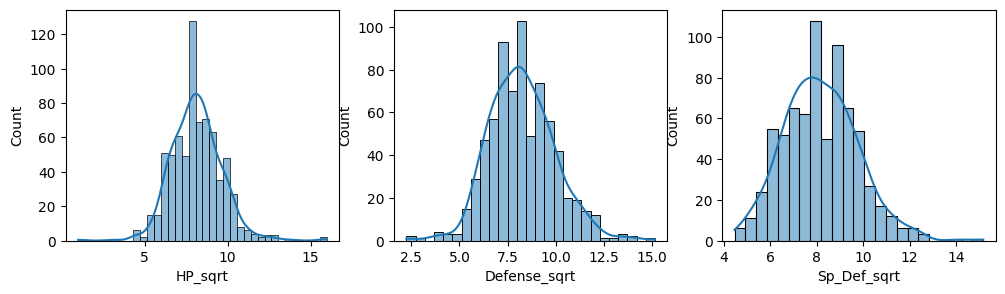

In [ ]:
# square root transformation

df['HP_sqrt'] = np.sqrt(df['HP'])
df['Defense_sqrt'] = np.sqrt(df['Defense'])
df['Sp_Def_sqrt'] = np.sqrt(df['Sp_Def'])

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(df['HP_sqrt'], kde=True, ax = axes[0])
sns.histplot(df['Defense_sqrt'], kde=True, ax = axes[1])
sns.histplot(df['Sp_Def_sqrt'], kde=True, ax = axes[2])
plt.show()

The results indicate that the logarithmic transformation shifts the distribution from right-skewed to left-skewed. Therefore, I opted for the square root transformation to better approximate a normal distribution for the right-skewed stats.


*3-b. Scaling (range: 0 to 100)*
<br>
To build a metric that fairly reflect each stats, we should adjust
To make the statistics comparable, I scaled each statistic to fall within the range of 0 to 100 by dividing the values of each statistic by its maximum value and then multiplying by 100. For the right-skewed stats, I used the root square transformation of the stats.

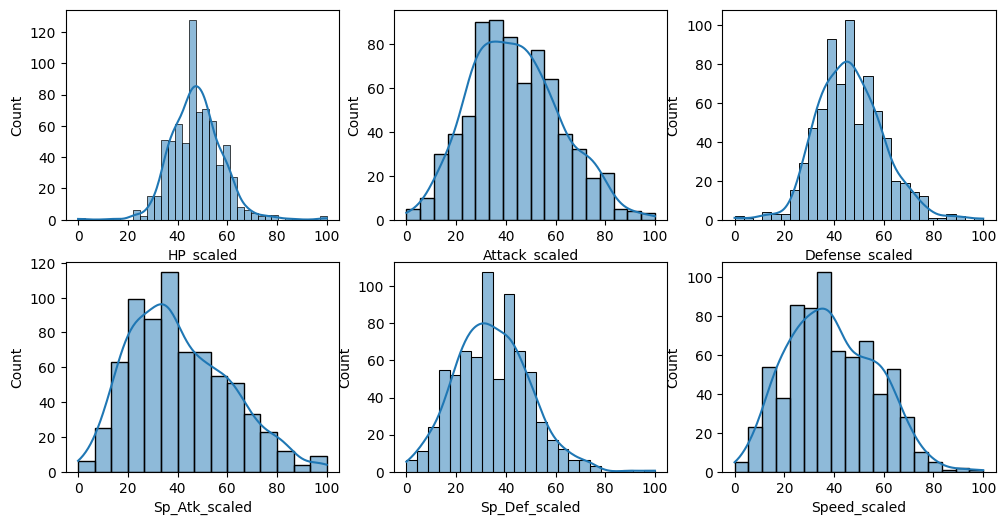

In [ ]:
adj = 100

max_HP_sqrt = df['HP_sqrt'].max()
min_HP_sqrt = df['HP_sqrt'].min()
df['HP_scaled'] = (df['HP_sqrt'] - min_HP_sqrt) * adj / (max_HP_sqrt - min_HP_sqrt)

max_Attack = df['Attack'].max()
min_Attack = df['Attack'].min()
df['Attack_scaled'] = (df['Attack'] - min_Attack) * adj / (max_Attack - min_Attack)

max_Defense_sqrt = df['Defense_sqrt'].max()
min_Defense_sqrt = df['Defense_sqrt'].min()
df['Defense_scaled'] = (df['Defense_sqrt'] - min_Defense_sqrt) * adj / (max_Defense_sqrt - min_Defense_sqrt)

max_Sp_Atk = df['Sp_Atk'].max()
min_Sp_Atk = df['Sp_Atk'].min()
df['Sp_Atk_scaled'] = (df['Sp_Atk'] - min_Sp_Atk) * adj / (max_Sp_Atk - min_Sp_Atk)

max_Sp_Def_sqrt = df['Sp_Def_sqrt'].max()
min_Sp_Def_sqrt = df['Sp_Def_sqrt'].min()
df['Sp_Def_scaled'] = (df['Sp_Def_sqrt'] - min_Sp_Def_sqrt) * adj / (max_Sp_Def_sqrt - min_Sp_Def_sqrt)

max_Speed = df['Speed'].max()
min_Speed = df['Speed'].min()
df['Speed_scaled'] = (df['Speed'] - min_Speed) * adj / (max_Speed - min_Speed)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
sns.histplot(df['HP_scaled'], kde=True, ax = axes[0, 0])
sns.histplot(df['Attack_scaled'], kde=True, ax = axes[0, 1])
sns.histplot(df['Defense_scaled'], kde=True, ax = axes[0, 2])
sns.histplot(df['Sp_Atk_scaled'], kde=True, ax = axes[1, 0])
sns.histplot(df['Sp_Def_scaled'], kde=True, ax = axes[1, 1])
sns.histplot(df['Speed_scaled'], kde=True, ax = axes[1, 2])
plt.show()

*3-c. New Metrics: ScaledSum and ScaledProduct*

We can verify that the stats generally follow normal distribution and are in the range between 0 and 100.

With the scaled stats, I created two metric, `ScaledSum`, the sum of the scaled stats, and `ScaledProduct`, the product of the scaled stats. `ScaledSum` is based on the assumption that each stat has only main effect on Pokémon''s strength, while `ScaledProduct` is based on the assumption that the stats have very stong interaction effect on it. These metrics are calculated as follows:

$$ScaledSum = HP_{scaled} + Attack_{scaled} + Defense_{scaled} + Sp\_Atk_{scaled} + Sp\_Def_{scaled} + Speed_{scaled} $$
$$ScaledProd = HP_{scaled} \times Attack_{scaled} \times Defense_{scaled} \times Sp\_Atk_{scaled} \times Sp\_Def_{scaled} \times Speed_{scaled} $$

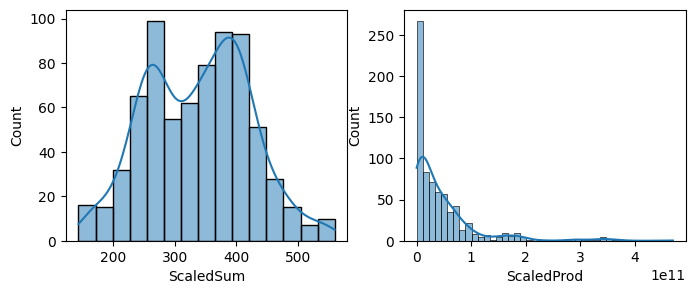

In [ ]:
# create the final metrics for evaluation
df['ScaledSum'] = df[['HP_scaled', 'Attack', 'Defense_scaled', 'Sp_Atk', 'Sp_Def_scaled', 'Speed']].sum(axis=1)
df['ScaledProd'] = df[['HP_scaled', 'Attack', 'Defense_scaled', 'Sp_Atk', 'Sp_Def_scaled', 'Speed']].prod(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(df['ScaledSum'], kde=True, ax = axes[0])
sns.histplot(df['ScaledProd'], kde=True, ax = axes[1])
plt.show()

We can veify that `ScaledSum` follows bimodal distribution and `ScaledProduct` follows geometric distribution.

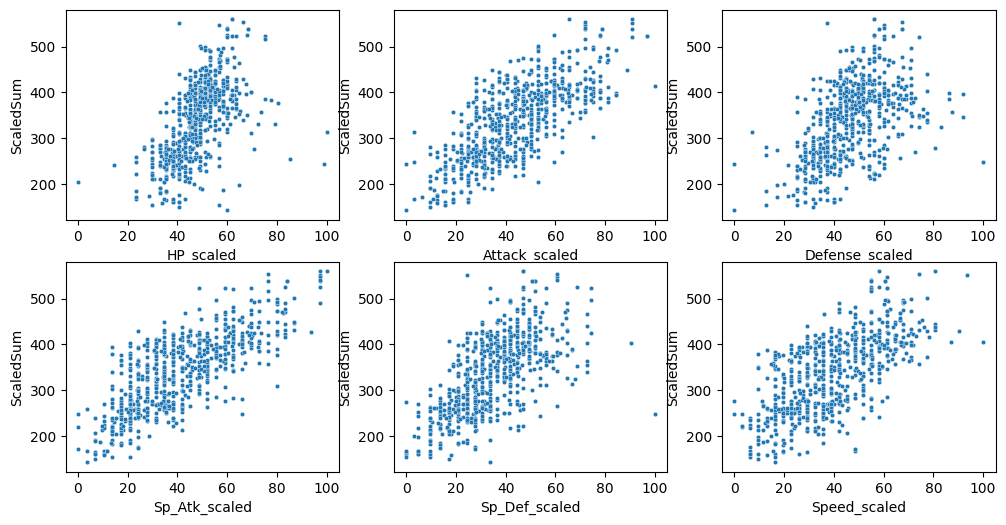

In [ ]:
# Scatterplots between the stats and ScaledSum
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
sns.scatterplot(data=df, x='HP_scaled', y='ScaledSum', ax = axes[0, 0], s = 10)
sns.scatterplot(data=df, x='Attack_scaled', y='ScaledSum', ax = axes[0, 1], s = 10)
sns.scatterplot(data=df, x='Defense_scaled', y='ScaledSum', ax = axes[0, 2], s = 10)
sns.scatterplot(data=df, x='Sp_Atk_scaled', y='ScaledSum', ax = axes[1, 0], s = 10)
sns.scatterplot(data=df, x='Sp_Def_scaled', y='ScaledSum', ax = axes[1, 1], s = 10)
sns.scatterplot(data=df, x='Speed_scaled', y='ScaledSum', ax = axes[1, 2], s = 10)
plt.show()

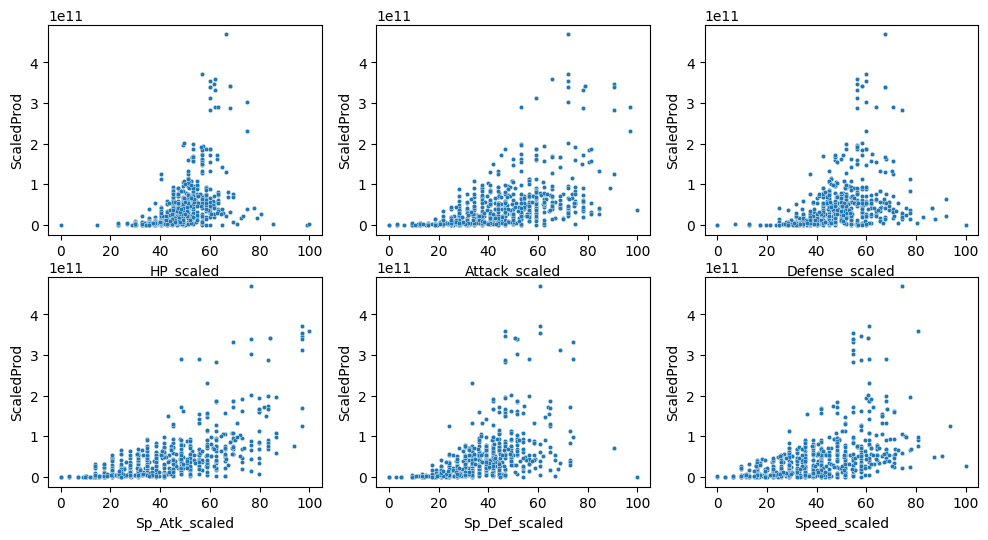

In [ ]:
# Scatterplots between the stats and ScaledProd

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
sns.scatterplot(data=df, x='HP_scaled', y='ScaledProd', ax = axes[0, 0], s = 10)
sns.scatterplot(data=df, x='Attack_scaled', y='ScaledProd', ax = axes[0, 1], s = 10)
sns.scatterplot(data=df, x='Defense_scaled', y='ScaledProd', ax = axes[0, 2], s = 10)
sns.scatterplot(data=df, x='Sp_Atk_scaled', y='ScaledProd', ax = axes[1, 0], s = 10)
sns.scatterplot(data=df, x='Sp_Def_scaled', y='ScaledProd', ax = axes[1, 1], s = 10)
sns.scatterplot(data=df, x='Speed_scaled', y='ScaledProd', ax = axes[1, 2], s = 10)
plt.show()

We can confirm that `ScaledSum` linearly increases as the stats summed increase, while `ScaledProd` exponentially increases as the stats multiplied increase.

**4. Metrics Development: *ScaledAvgSum* and *ScaledAvgSum***

4-a. Average of Attack and Defense

We can critique the Total metric in the original dataset, as well as `ScaledSum` and `ScaledProduct`, for combining both `Attack` with `Sp_Atk` and `Defense` with `Sp_Def`. By simply adding or multiplying these related stats, these metrics may disproportionately emphasize attack and defense capabilities, potentially skewing the evaluation of a character’s overall strength.

To address this issue, I created new stats by averaging existing values. Specifically, `AttckAvg` represents the average of `Attack` and `Sp_Atk`, while `DefenseAvg` is the average of `Defense` and `Sp_Def`. I chose to use a simple average rather than a weighted average due to the lack of additional information provided in the question.
<br>
<br>
$$AttackAvg = \frac{Attack + Sp\_Atk}{2}$$
$$DefenseAvg = \frac{Defense + Sp\_Def}{2}$$

By using these two averages to create new metrics, we can reduce the distortion caused by the previous approach, providing a more balanced view of a character’s attack and defense capabilities. The new metrics are caculated as follows:



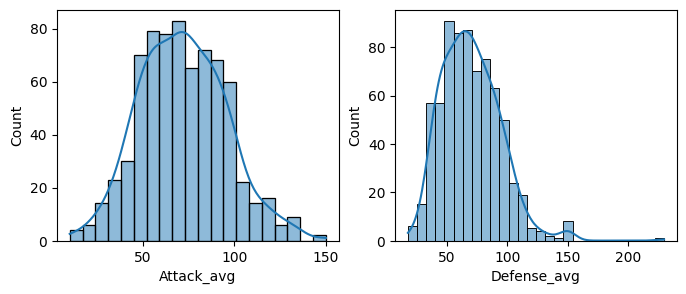

In [ ]:
# Create new stats by taking average
df['Attack_avg'] = df[['Attack', 'Sp_Atk']].mean(axis=1)
df['Defense_avg'] = df[['Defense', 'Sp_Def']].mean(axis=1)

# Histograms of new stats
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(df['Attack_avg'], kde=True, ax = axes[0])
sns.histplot(df['Defense_avg'], kde=True, ax = axes[1])
plt.show()

Since the `Defense_avg` is right-skewed, the root square transformation of this stat should be used for scaling.

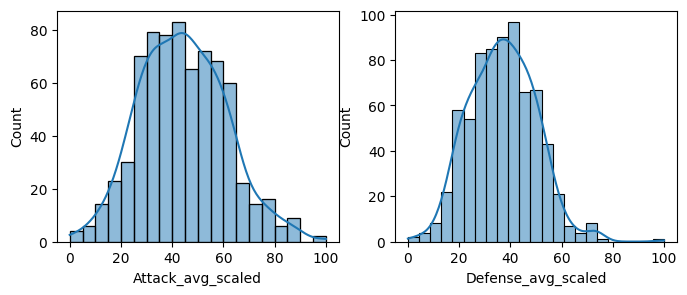

In [ ]:
# Normalize and scale the stats
max_Attack_avg = df['Attack_avg'].max()
min_Attack_avg = df['Attack_avg'].min()
df['Attack_avg_scaled'] = (df['Attack_avg'] - min_Attack_avg) * adj / (max_Attack_avg - min_Attack_avg)

df['Defense_avg_sqrt'] = np.sqrt(df['Defense_avg'])
max_Defense_avg_sqrt = df['Defense_avg_sqrt'].max()
min_Defense_avg_sqrt = df['Defense_avg_sqrt'].min()
df['Defense_avg_scaled'] = (df['Defense_avg_sqrt'] - min_Defense_avg_sqrt) * adj / (max_Defense_avg_sqrt - min_Defense_avg_sqrt)

# Histogram of scaled stats
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(df['Attack_avg_scaled'], kde=True, ax = axes[0])
sns.histplot(df['Defense_avg_scaled'], kde=True, ax = axes[1])
plt.show()

*4-b. New Metrics: ScaledAvgSum and ScaledAvgProd*

The results show that the two stats are in the range between 0 and 100, and `Defense_avg_scaled` is approximately following normal distribution. Using these scaled stats, `Attack_avg_scaled` and `Defense_avg_scaled`, I created the new metrics `ScaledAvgSum` and `ScaledAvgProd` as follows:

$$ScaledAvgSum = HP_{scaled} + AttackAvg_{scaled} + DefenseAvg_{scaled} + Speed_{scaled}$$
$$ScaledAvgProd = HP_{scaled} \times AttackAvg_{scaled} \times DefenseAvg_{scaled} \times Speed_{scaled}$$

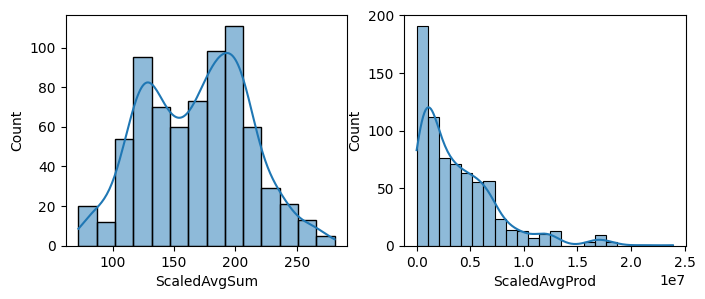

In [ ]:
# Create new metrics using new stats

df['ScaledAvgSum'] = df[['HP_scaled', 'Attack_avg_scaled', 'Defense_avg_scaled', 'Speed_scaled']].sum(axis=1)
df['ScaledAvgProd'] = df[['HP_scaled', 'Attack_avg_scaled', 'Defense_avg_scaled', 'Speed_scaled']].prod(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(df['ScaledAvgSum'], kde=True, ax = axes[0])
sns.histplot(df['ScaledAvgProd'], kde=True, ax = axes[1])
plt.show()

We can veify that `ScaledAvgSum` follows bimodal distribution and `ScaledAvgProduct` follows geometric distribution.

<Axes: xlabel='Speed_scaled', ylabel='ScaledAvgSum'>

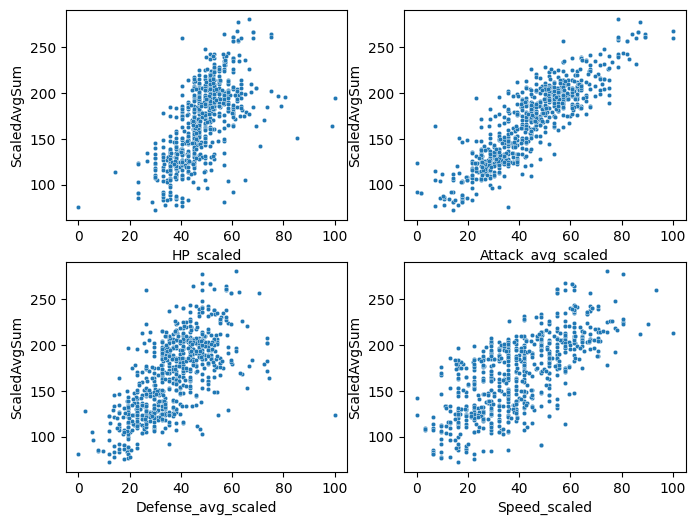

In [ ]:
# Scatterplots between ScaledAvgSum and stats

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
sns.scatterplot(data=df, x='HP_scaled', y='ScaledAvgSum', ax = axes[0, 0], s = 10)
sns.scatterplot(data=df, x='Attack_avg_scaled', y='ScaledAvgSum', ax = axes[0, 1], s = 10)
sns.scatterplot(data=df, x='Defense_avg_scaled', y='ScaledAvgSum', ax = axes[1, 0], s = 10)
sns.scatterplot(data=df, x='Speed_scaled', y='ScaledAvgSum', ax = axes[1, 1], s = 10)


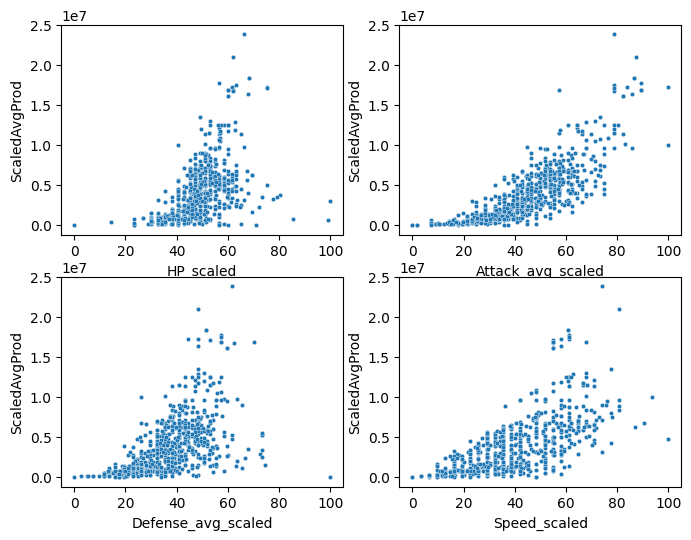

In [ ]:
# Scatterplots between ScaledAvgProd and stats

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
sns.scatterplot(data=df, x='HP_scaled', y='ScaledAvgProd', ax = axes[0, 0], s = 10)
sns.scatterplot(data=df, x='Attack_avg_scaled', y='ScaledAvgProd', ax = axes[0, 1], s = 10)
sns.scatterplot(data=df, x='Defense_avg_scaled', y='ScaledAvgProd', ax = axes[1, 0], s = 10)
sns.scatterplot(data=df, x='Speed_scaled', y='ScaledAvgProd', ax = axes[1, 1], s = 10)
plt.show()

We can confirm that `ScaledAvgSum` linearly increases as the stats summed increase, while `ScaledAvgProd` exponentially increases as the stats multiplied increase.

**5. Metrics Development: *ScaledAvgEffSum***
<br>
*5-a. Indirect effect*
<br>
We can critique `ScaledAvgSum` and `ScaledAvgProd` for not considering the actual relationship between the stats. By simply adding or multiplying `HP` and `Speed` with `AttackAvg` and `DefenseAvg`, the newly created stats, does not reflect the dynamics of the gaming experience of users.

To be specific, `Speed` amplifies the effects of `Attack` and `Sp_Atk` on Pokémon's strength in battles. In original Pokémon games, not in Pokémon Go, Pokémon with higher `Speed` can attack first. This means that Pokémon with high `Speed` and high `Attack`/`Sp_Atk` can be strategically used as "sweepers" because they can attack the opponents first with high damage and potentially knock out them before they retalitate. Therefore, it makes more sense to consider the combined effect of `Speed` and `AttackAvg` in the metric rather than treating them separately. I created a new stat, `AttackAvgEff`, to indicate the effectiveness of a Pokémon's `AttackAvg` in battles when moderated by its `Speed`, calculated as follows:

$$AttackAvgEff = AttackAvg \times Speed$$

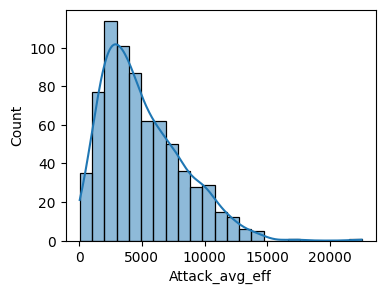

In [ ]:
df['Attack_avg_eff'] = df['Attack_avg'] * df['Speed']

plt.figure(figsize = (4, 3))
sns.histplot(df['Attack_avg_eff'], kde=True)
plt.show()

The histogram indicates that the `Attack_avg_eff` is right-skewed. To address this, I applied a root squre transformation to approximate a normal distribution and scaled the values to fall within a range of 0 to 100.

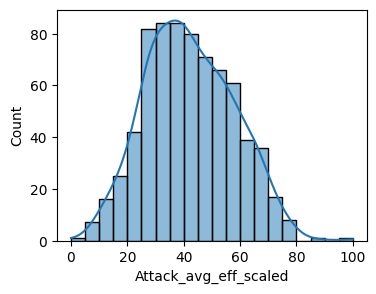

In [ ]:
df['Attack_avg_eff_sqrt'] = np.sqrt(df['Attack_avg_eff'])
max_Attack_avg_eff_sqrt = df['Attack_avg_eff_sqrt'].max()
min_Attack_avg_eff_sqrt = df['Attack_avg_eff_sqrt'].min()
df['Attack_avg_eff_scaled'] = (df['Attack_avg_eff_sqrt'] - min_Attack_avg_eff_sqrt) * adj / (max_Attack_avg_eff_sqrt - min_Attack_avg_eff_sqrt)

plt.figure(figsize = (4, 3))
sns.histplot(df['Attack_avg_eff_scaled'], kde=True)
plt.show()

*5-b. Metrics Development: ScaledAvgEffSum*
<br>
The new histogram shows that the `Attack_avg_eff_scaled` follows a normal distribution approximately, and fall within the range of 0 to 100. The new metric using this stat is calculated as follows:

$$ScaledAvgEffSum = HP_{scaled} + AttackAvgEff_{scaled} + DefenseAvg_{scaled}$$

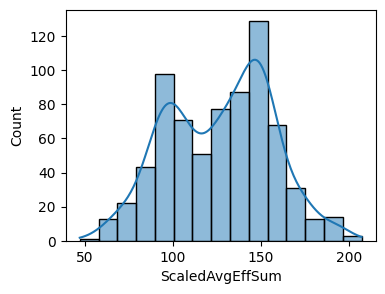

In [ ]:
df['ScaledAvgEffSum'] = df[['HP_scaled', 'Attack_avg_eff_scaled', 'Defense_avg_scaled']].sum(axis=1)

plt.figure(figsize = (4, 3))
sns.histplot(df['ScaledAvgEffSum'], kde=True)
plt.show()

The histogram shows that `ScaledAvgEffSum` follows a bimodal distribution.

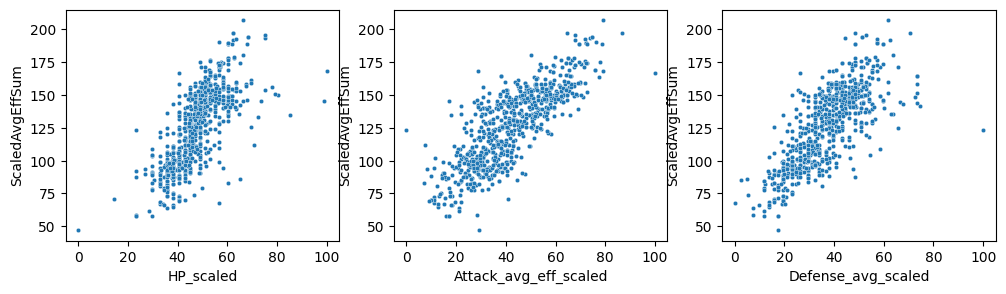

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
sns.scatterplot(data=df, x='HP_scaled', y='ScaledAvgEffSum', ax = axes[0], s = 10)
sns.scatterplot(data=df, x='Attack_avg_eff_scaled', y='ScaledAvgEffSum', ax = axes[1], s = 10)
sns.scatterplot(data=df, x='Defense_avg_scaled', y='ScaledAvgEffSum', ax = axes[2], s = 10)
plt.show()

We can confirm that `ScaledAvgEffSum` linearly increases as the stats summed increase.

**6. Summary**
<br>
Considering that each battle allows the selection of three Pokémon, I calculated the average performance of the top three Pokémon in each group across various metrics. I then ranked each type based on these average scores.

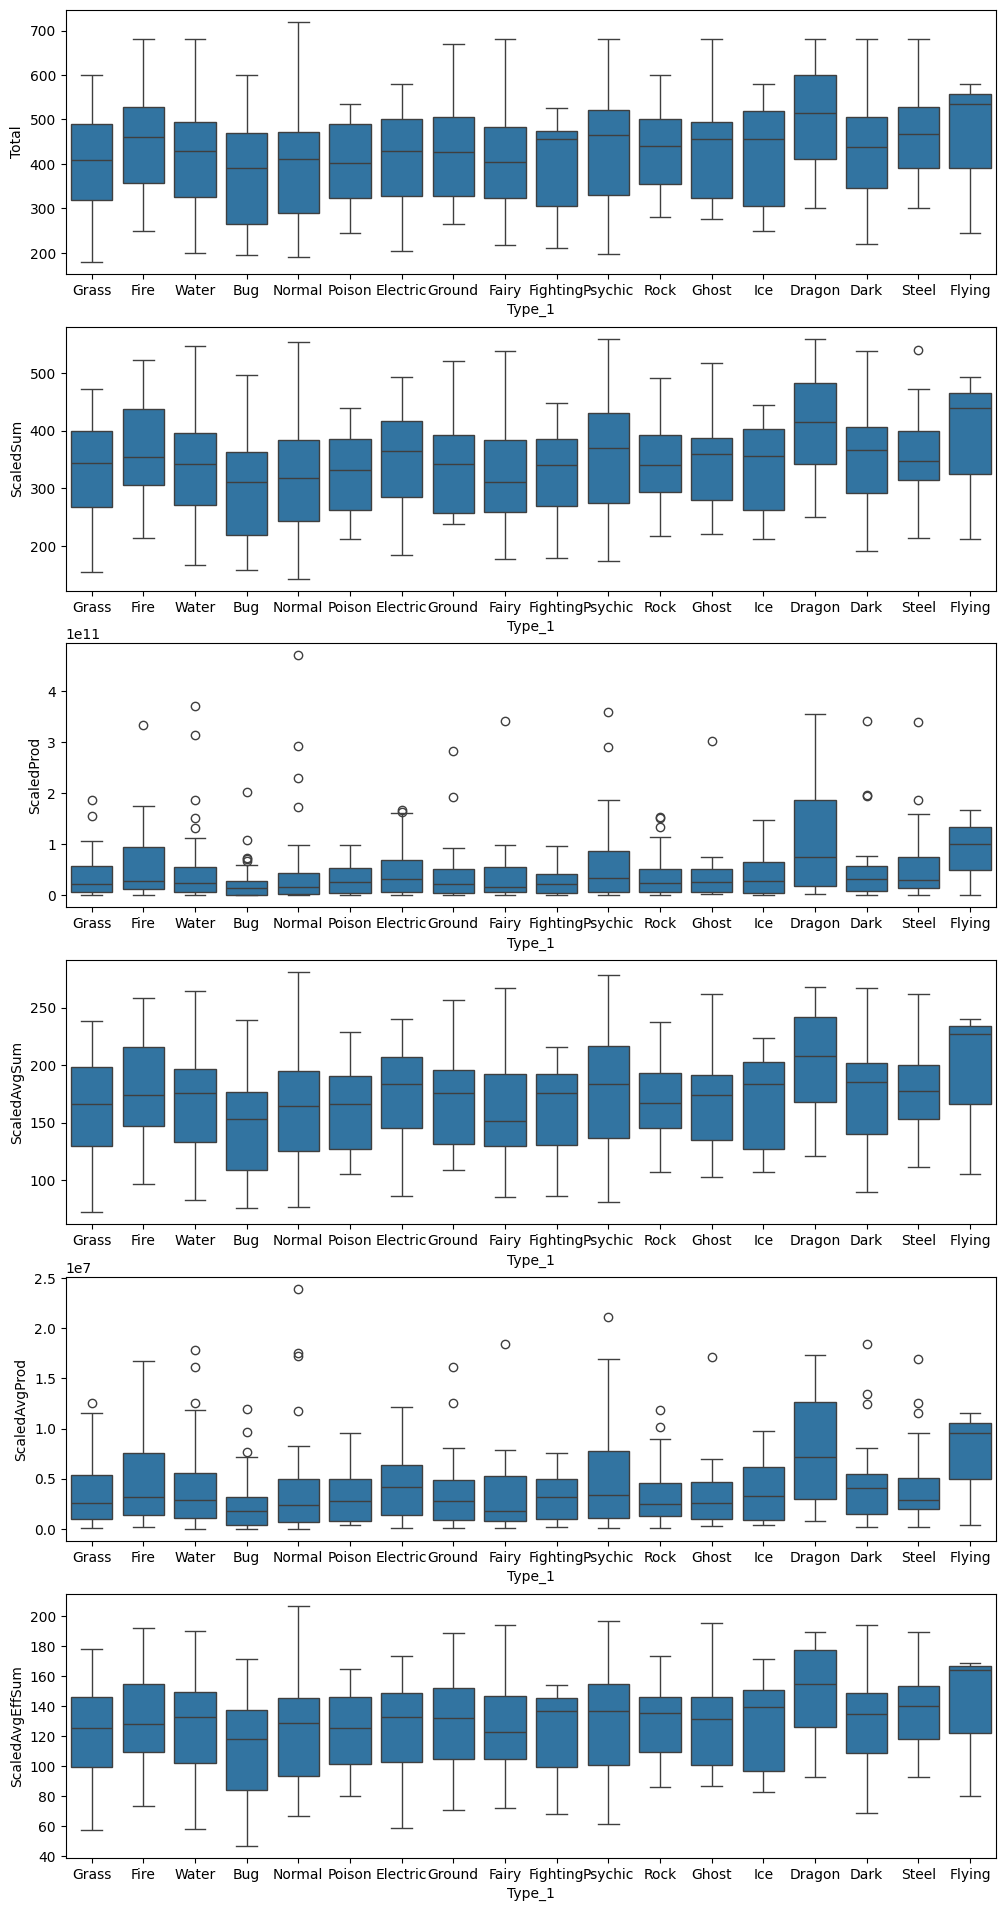

In [ ]:
metrics = ['Total', 'ScaledSum', 'ScaledProd', 'ScaledAvgSum', 'ScaledAvgProd', 'ScaledAvgEffSum']

fig, axes = plt.subplots(6, 1, figsize=(12, 24))
for m in metrics:
  sns.boxplot(data=df, x='Type_1', y=m, ax = axes[metrics.index(m)])
plt.show()

7. All-star

In [ ]:
top_3_dict = {}  # Dictionary to store the top 3 for each metric

for metric in metrics:
    ranked_pokemon = df.sort_values(by=metric, ascending=False)
    top_3_pokemon_numbers = ranked_pokemon.head(3)['Number'].tolist()
    top_3_dict[metric] = top_3_pokemon_numbers  # Store in the dictionary

# Create a DataFrame from the dictionary
top_3_table = pd.DataFrame(top_3_dict)
print(top_3_table)

   Total  ScaledSum  ScaledProd  ScaledAvgSum  ScaledAvgProd  ScaledAvgEffSum
0    493        384         493           493            493              493
1    644        150         484           150            150              249
2    487        493         150           384            716              150


In [ ]:
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt

def display_pokemon_images_by_number(df, pokemon_numbers):
    # num_pokemon = len(pokemon_numbers)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, pokemon_number in enumerate(pokemon_numbers):
        # Construct image URL
        image_url = f'https://www.pokemon.com/static-assets/content-assets/cms2/img/pokedex/full/{pokemon_number}.png'

        # Generate caption using the generate_caption_from_df_by_number function
        caption = generate_caption_from_df_by_number(df, pokemon_number)

        try:
            # Fetch the image from the URL
            response = requests.get(image_url, stream=True)
            response.raise_for_status()  # Raise an exception for bad responses
            image = Image.open(BytesIO(response.content)).convert("RGB")  # Convert to RGB

            # Display image with caption
            axes[i].imshow(image)
            axes[i].set_title(caption, fontsize=10)
            axes[i].axis('off')  # Remove axes
        except (requests.exceptions.RequestException, UnidentifiedImageError) as e:
            print(f"Error loading or displaying image for Pokémon {pokemon_number}: {e}")

    plt.tight_layout()
    plt.show()

All-star Pokémon Team based on Total


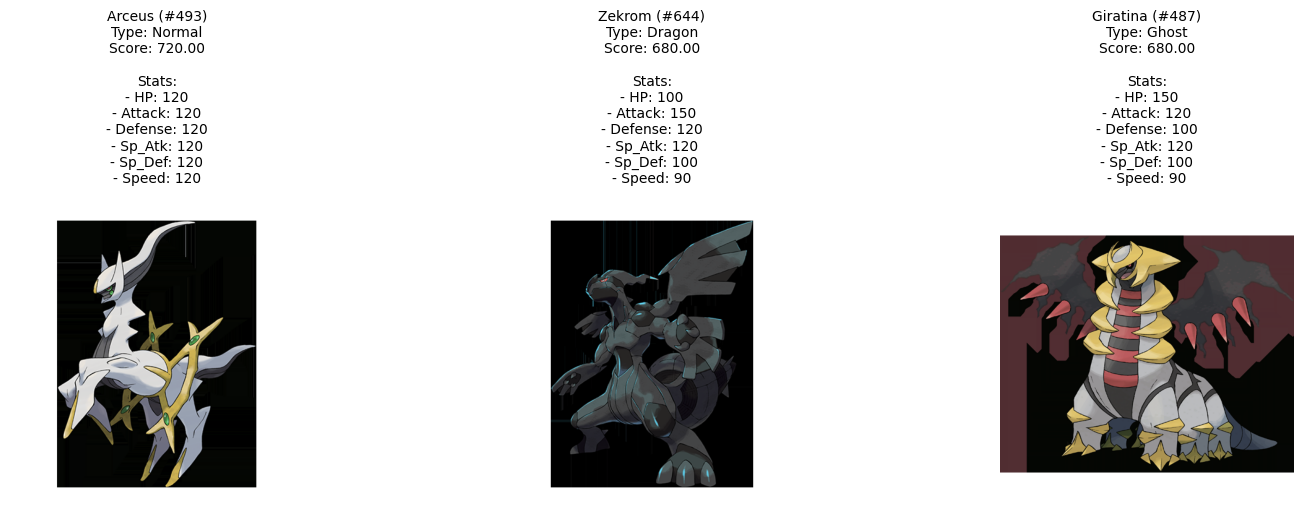

All-star Pokémon Team based on ScaledSum


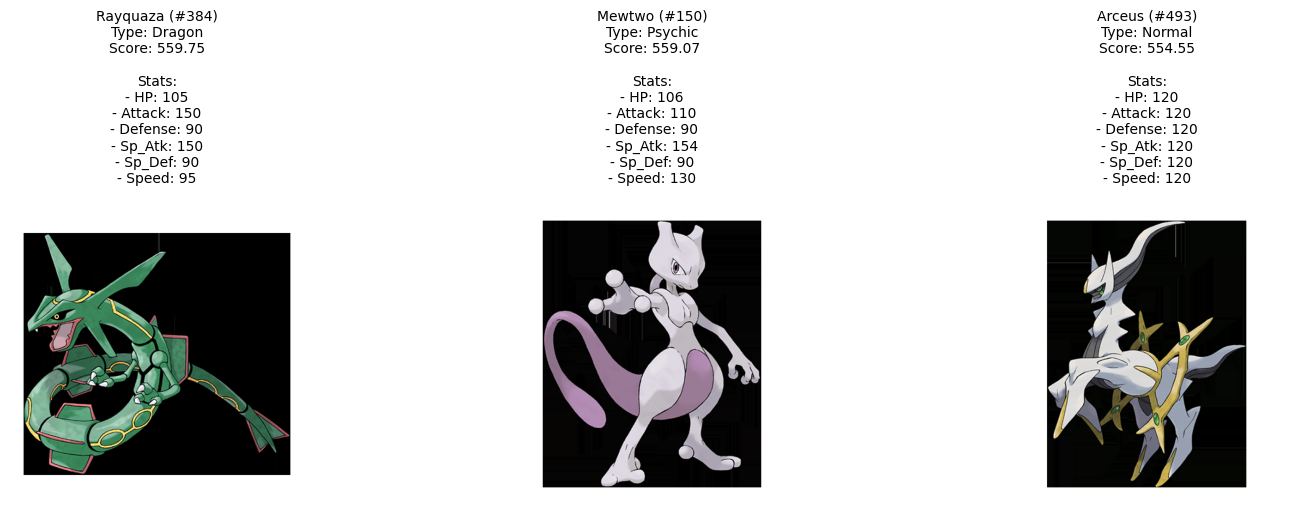

All-star Pokémon Team based on ScaledProd


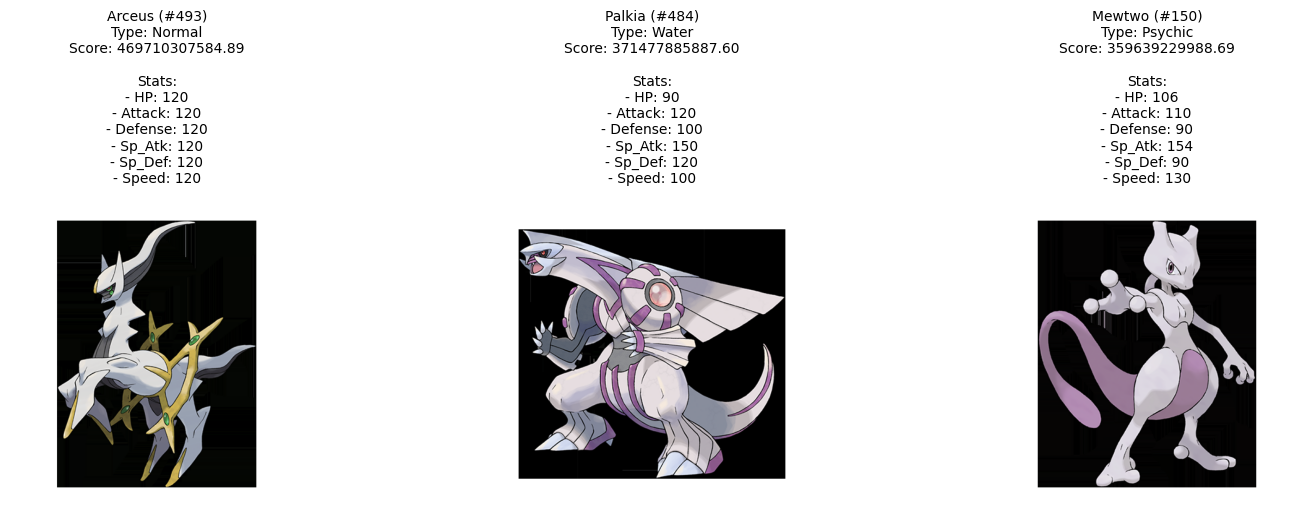

All-star Pokémon Team based on ScaledAvgSum


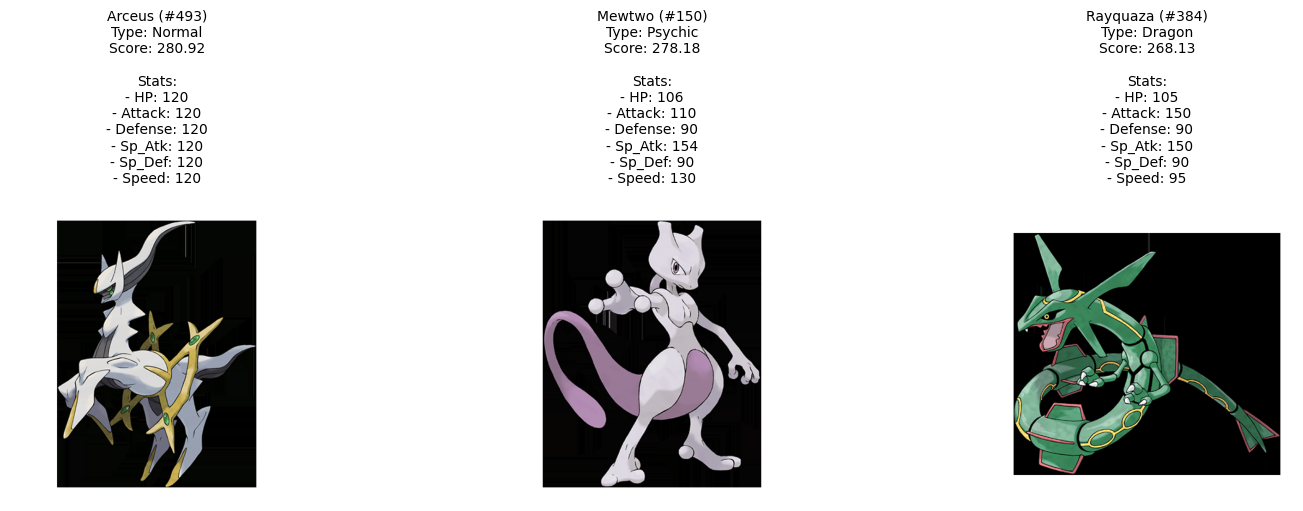

All-star Pokémon Team based on ScaledAvgProd


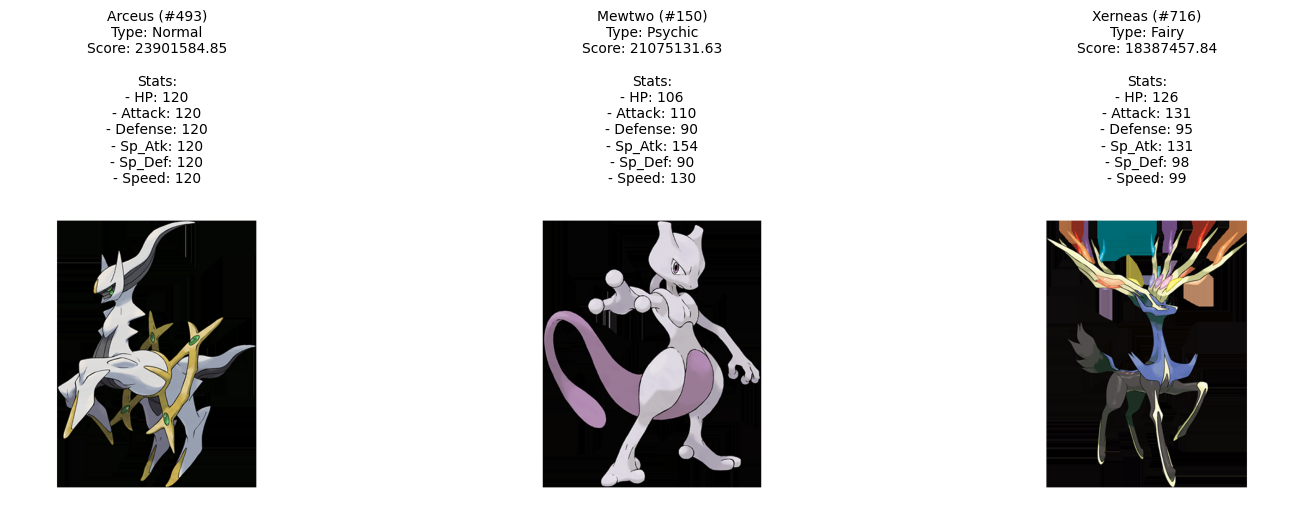

All-star Pokémon Team based on ScaledAvgEffSum


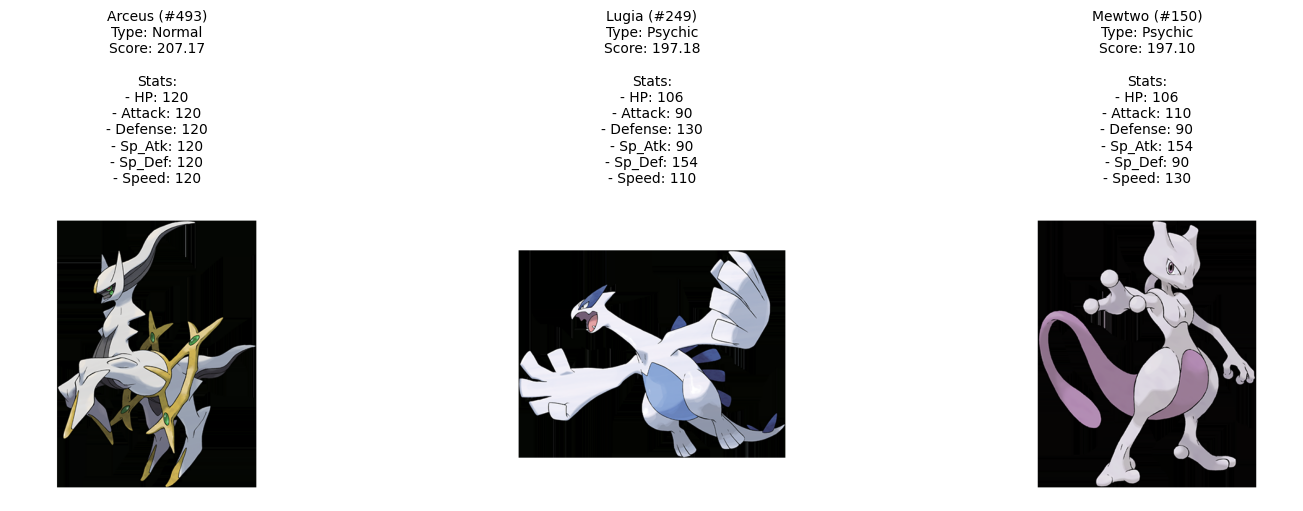

In [ ]:
for m in metrics:

  def generate_caption_from_df_by_number(df, pokemon_number):

    pokemon_row = df[df['Number'] == pokemon_number].iloc[0]  # Get the row for the Pokémon
    name = pokemon_row['Name']
    type_1 = pokemon_row['Type_1']
    metric_score = pokemon_row[m]
    stats = pokemon_row[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']].to_dict()

    # Create the caption string (including stats)
    caption = f"{name} (#{pokemon_number})\nType: {type_1}\nScore: {metric_score:.2f}\n"
    caption += "\nStats:\n"
    for stat_name, stat_value in stats.items():
        caption += f"- {stat_name}: {stat_value}\n"

    return caption

  print(f"All-star Pokémon Team based on {m}")
  pokemon_numbers_to_display = top_3_table[m].tolist()
  display_pokemon_images_by_number(df, pokemon_numbers_to_display)